In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import sleep
import datetime
import json
#import scipy.stats as stats
from scipy.stats.stats import pearsonr 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# Lists for holding random lat_lngs & unique: cities,  country codes, latitudes & longitudes
lat_lngs = []
lat_unique =  []
lng_unique = []
cities = []
country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city and associated country code for each lat, lng combination
for lat_lng in lat_lngs:
    temp_city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = temp_city.city_name
    cc = temp_city.country_code
    # If the city is unique, then add it to our cities list and add the country code to country_code list
    if city not in cities:
        cities.append(city)
        country_code.append(cc)
        lat_unique.append(lat_lng[0])
        lng_unique.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

620

In [22]:
# Create a dataframe from the lists

city_df = pd.DataFrame({'City': cities,
                       'Country Code': country_code,
                       'Latitude': lat_unique,
                       'Longitude': lng_unique,
                       })
city_df.head()

,City,Country Code,Latitude,Longitude
0,lorengau,pg,4.483429,148.177291
1,ushuaia,ar,-75.622312,-77.521682
2,kodiak,us,43.997904,-159.170916
3,hobart,au,-42.445529,148.390026
4,ofunato,jp,38.941021,141.756422


In [23]:
# Create a city_df which contains only the first 5 cities of the city_df 
# Use this df to build the code and avoid too many calls to the API and getting locked out

#city_df = city_df.iloc[0:5,:]  # When finished building/testing, then remove this line
len(city_df['City'])

620

# Make API call and get weather data - Using Latitude & Longitude

In [25]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [26]:
# Loop through each city and perform the following actions within each cycle of the loop:
    # Build query URL for city weather info using Lat & Long --> Note:  must convert lat & long to string values
        # Include a sleep time in the query to avoid too many rapid 'pings' against the API
    # Print Log including City Number and City Name
    # Make API call for the city to retrieve its weather info
    # Extract temperature, humidity, cloudiness and wind speed data for each city and append to individual lists

# Establish the lists to hold the individual weather items for all cities

city_temp = []
city_humidity = []
city_cloudiness = []
city_wind_speed = []

# Loop through each city and extract the desired weather data

for x in range(len(city_df['City'])):

    # Build query URL for each city
    query_url_lat_long = url + "&lat=" + city_df['Latitude'].iloc[x].astype(str) + "&lon=" +\
    city_df['Longitude'].iloc[x].astype(str)

    # Print Log including City Number and City Name
    print(f'Making request for City Number: {x}  City Name: {cities[x]}')

    # Make the API call and store the json response
    weather_response = requests.get(query_url_lat_long)
    weather_json = weather_response.json()
    sleep(.2) # sleep .2 sec after every API call

    # Append the weather data for each city to the respective weather data lists (temp, humidity, cloudiness, wind speed)
    city_temp.append(weather_json['main']['temp'])
    city_humidity.append(weather_json['main']['humidity'])
    city_cloudiness.append(weather_json['clouds']['all'])
    city_wind_speed.append(weather_json['wind']['speed'])



Making request for City Number: 0  City Name: lorengau
Making request for City Number: 1  City Name: ushuaia
Making request for City Number: 2  City Name: kodiak
Making request for City Number: 3  City Name: hobart
Making request for City Number: 4  City Name: ofunato
Making request for City Number: 5  City Name: qaanaaq
Making request for City Number: 6  City Name: tiarei
Making request for City Number: 7  City Name: new norfolk
Making request for City Number: 8  City Name: sorland
Making request for City Number: 9  City Name: vao
Making request for City Number: 10  City Name: tuktoyaktuk
Making request for City Number: 11  City Name: mys shmidta
Making request for City Number: 12  City Name: ayan
Making request for City Number: 13  City Name: talara
Making request for City Number: 14  City Name: severo-kurilsk
Making request for City Number: 15  City Name: mandera
Making request for City Number: 16  City Name: albany
Making request for City Number: 17  City Name: arraial do cabo
Maki

Making request for City Number: 145  City Name: bredasdorp
Making request for City Number: 146  City Name: thompson
Making request for City Number: 147  City Name: deder
Making request for City Number: 148  City Name: kirakira
Making request for City Number: 149  City Name: cabo san lucas
Making request for City Number: 150  City Name: liepaja
Making request for City Number: 151  City Name: tsihombe
Making request for City Number: 152  City Name: claremore
Making request for City Number: 153  City Name: nanortalik
Making request for City Number: 154  City Name: port alfred
Making request for City Number: 155  City Name: palu
Making request for City Number: 156  City Name: yanggu
Making request for City Number: 157  City Name: brandon
Making request for City Number: 158  City Name: moroni
Making request for City Number: 159  City Name: sitka
Making request for City Number: 160  City Name: binzhou
Making request for City Number: 161  City Name: gaoual
Making request for City Number: 162 

Making request for City Number: 288  City Name: paamiut
Making request for City Number: 289  City Name: bontang
Making request for City Number: 290  City Name: ankazoabo
Making request for City Number: 291  City Name: livingstone
Making request for City Number: 292  City Name: canmore
Making request for City Number: 293  City Name: pemangkat
Making request for City Number: 294  City Name: yangjiang
Making request for City Number: 295  City Name: grindavik
Making request for City Number: 296  City Name: la grande
Making request for City Number: 297  City Name: kruisfontein
Making request for City Number: 298  City Name: petropavlovsk-kamchatskiy
Making request for City Number: 299  City Name: poum
Making request for City Number: 300  City Name: northam
Making request for City Number: 301  City Name: ixtapa
Making request for City Number: 302  City Name: tabiauea
Making request for City Number: 303  City Name: port blair
Making request for City Number: 304  City Name: airai
Making reques

Making request for City Number: 431  City Name: kismayo
Making request for City Number: 432  City Name: alice springs
Making request for City Number: 433  City Name: norman wells
Making request for City Number: 434  City Name: formosa
Making request for City Number: 435  City Name: nenjiang
Making request for City Number: 436  City Name: chumikan
Making request for City Number: 437  City Name: peniche
Making request for City Number: 438  City Name: tysons corner
Making request for City Number: 439  City Name: upington
Making request for City Number: 440  City Name: nur
Making request for City Number: 441  City Name: stillwater
Making request for City Number: 442  City Name: nabire
Making request for City Number: 443  City Name: namatanai
Making request for City Number: 444  City Name: klaksvik
Making request for City Number: 445  City Name: okhotsk
Making request for City Number: 446  City Name: jacareacanga
Making request for City Number: 447  City Name: port hardy
Making request for 

Making request for City Number: 575  City Name: cap-aux-meules
Making request for City Number: 576  City Name: umm kaddadah
Making request for City Number: 577  City Name: basco
Making request for City Number: 578  City Name: mianyang
Making request for City Number: 579  City Name: ilhabela
Making request for City Number: 580  City Name: ahuimanu
Making request for City Number: 581  City Name: qujing
Making request for City Number: 582  City Name: dawei
Making request for City Number: 583  City Name: gizo
Making request for City Number: 584  City Name: honningsvag
Making request for City Number: 585  City Name: maua
Making request for City Number: 586  City Name: loralai
Making request for City Number: 587  City Name: mari-turek
Making request for City Number: 588  City Name: sola
Making request for City Number: 589  City Name: kununurra
Making request for City Number: 590  City Name: acajutla
Making request for City Number: 591  City Name: cockburn town
Making request for City Number:

In [27]:
# Take the individual lists of City temperature, humidity, cloudiness & wind speed and add to the main dataframe

#First make the list into a Series:
city_temp_series = pd.Series(city_temp)
city_humidity_series = pd.Series(city_humidity)
city_cloudiness_series = pd.Series(city_cloudiness)
city_wind_speed_series = pd.Series(city_wind_speed)

#Then add the values to the DataFrame:
city_df['Temp'] = city_temp_series.values
city_df['Humidity'] = city_humidity_series.values
city_df['Cloudiness'] = city_cloudiness_series.values
city_df['Wind Speed (mph)'] = city_wind_speed_series.values
city_df.head()


,City,Country Code,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed (mph)
0,lorengau,pg,4.483429,148.177291,80.22,100,76,1.14
1,ushuaia,ar,-75.622312,-77.521682,-2.86,69,64,27.09
2,kodiak,us,43.997904,-159.170916,58.62,97,92,14.79
3,hobart,au,-42.445529,148.390026,55.29,94,76,18.03
4,ofunato,jp,38.941021,141.756422,73.74,100,92,10.65


In [28]:
# Only used during testing phase to minimize API calls to OpenWeather
#lat_temporary = lat_unique[:5]
#print(lat_temporary)

In [29]:
time_now = datetime.datetime.now().strftime("%d %B %Y / %H:%M EST")


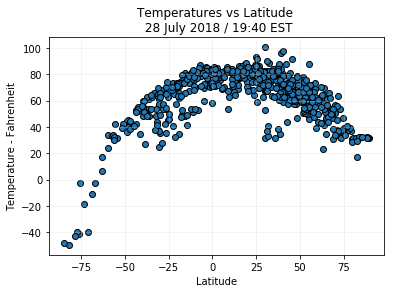

In [42]:
# Plot Temperatures vs Latitude

#lat_temporary = lat_unique[:5] # delete this after done testing and substitute lat_unique for lat_temporary in scatter plot
plt.scatter(lat_unique, city_temp, edgecolors='black')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5, alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature - Fahrenheit')
plt.title(f'Temperatures vs Latitude \n {time_now}')
plt.savefig('output_data/Temp_v_Latitude.png')

plt.show()

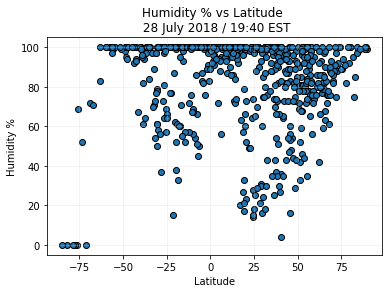

In [43]:
# Plot Humidity vs Latitude

#lat_temporary = lat_unique[:5] # delete this after done testing and substitute lat_unique for lat_temporary in scatter plot

plt.scatter(lat_unique, city_humidity, edgecolors='black')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5, alpha=.5)
ax.set_facecolor('xkcd:salmon')
plt.
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Humidity % vs Latitude \n {time_now}')
plt.savefig('output_data/Humidity_v_Latitude.png')

plt.show()

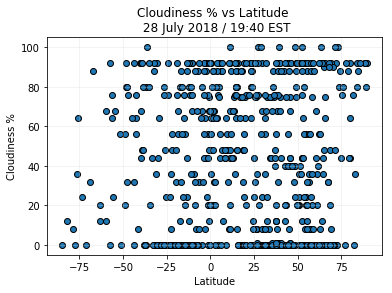

In [44]:
# Plot Cloudiness vs Latitude

#lat_temporary = lat_unique[:5] # delete this after done testing and substitute lat_unique for lat_temporary in scatter plot

plt.scatter(lat_unique, city_cloudiness, edgecolors='black')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5, alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Cloudiness % vs Latitude \n {time_now}')
plt.savefig('output_data/Cloudiness_v_Latitude.png')

plt.show()

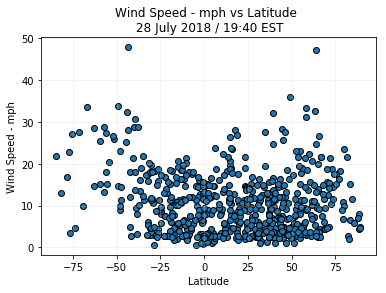

In [45]:
# Plot Wind Speed vs Latitude

#lat_temporary = lat_unique[:5] # delete this after done testing and substitute lat_unique for lat_temporary in scatter plot

plt.scatter(lat_unique, city_wind_speed, edgecolors='black')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5, alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed - mph')
plt.title(f'Wind Speed - mph vs Latitude \n {time_now}')
plt.savefig('output_data/Wind_Speed_v_Latitude.png')

plt.show()

In [35]:
# Save the entire dataframe with all cities and all weather info to a csv file
city_df.to_csv(output_data_file, encoding='utf-8', index=False)


In [56]:
# Examine the correlation between Latitude and Cloudiness --> from the low r-value and high (> .05) p-value, we conclude that
    # there is no correlation between Latitude and Cloudiness

output = list(stats.pearsonr(city_df['Latitude'],city_df['Cloudiness']))

print(f'Pearson r-value is: {output[0]:.2f}')
print(f'Pearson p-value is: {output[1]:.6f}')

Pearson r-value is: 0.06
Pearson p-value is: 0.158268


# Observable Trends

    # 1.  From Temperatures vs Latitude, we see that temperatures tend to be highest near the equator (i.e. latitude of 0 
        # degrees).
    # 2.  From Temperatures vs Latitude, we also see that temperatures will drop as we move away from the equator (i.e. as we
        # move either north (positive latitudes) or south (negative latitudes) from the equator.
    # 3.  From Cloudiness vs Latitude, a visual inspection of the scatter plot suggests very littel correlation between these
        # elements.  Further, after performing a Pearson correlation analysis we see the resultant very low r-value and high
        # p-value (> .05) which supports the conclusion that there is no correlation between Latitude and Cloudiness.  
    # 4.  From Temperatures vs Latitude we see that the coldest temperatures (and the frequency of the coldest temperatures) is 
        # greatest in the Southern hemisphere (negative latitudes).  This makes sense as Antarctica is much colder than the 
        # Artic/North pole due to: mountainous region/higher elevations in Antarctica; land mass (Antarctica is a land mass) 
        # loses heat much faster than water (Artic is really just ice) --> thus Antarctica is much colder and this seems to be
        # reflected in our chart.  

# Useful JSON visualizations

In [36]:
print(weather_json)

{'coord': {'lon': 82.04, 'lat': 60.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 60.06, 'pressure': 1008.4, 'humidity': 76, 'temp_min': 60.06, 'temp_max': 60.06, 'sea_level': 1021.04, 'grnd_level': 1008.4}, 'wind': {'speed': 3.71, 'deg': 212.503}, 'rain': {'3h': 0.225}, 'clouds': {'all': 44}, 'dt': 1532821158, 'sys': {'message': 0.0029, 'sunrise': 1532728860, 'sunset': 1532790836}, 'id': 0, 'name': '', 'cod': 200}


In [37]:
# Pretty Print the output of the JSON response

print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": 60.5,
        "lon": 82.04
    },
    "dt": 1532821158,
    "id": 0,
    "main": {
        "grnd_level": 1008.4,
        "humidity": 76,
        "pressure": 1008.4,
        "sea_level": 1021.04,
        "temp": 60.06,
        "temp_max": 60.06,
        "temp_min": 60.06
    },
    "name": "",
    "rain": {
        "3h": 0.225
    },
    "sys": {
        "message": 0.0029,
        "sunrise": 1532728860,
        "sunset": 1532790836
    },
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 212.503,
        "speed": 3.71
    }
}
